**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

**Upload Train and Test Images**

In [ ]:
# Install Kaggle library in Colab
!pip install kaggle
# Move Kaggle API token to the appropriate directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Set appropriate permissions for the Kaggle API token
!chmod 600 ~/.kaggle/kaggle.json
# Download the dataset using Kaggle API
!kaggle datasets download -d aadityasinghal/facial-expression-dataset
# Unzip the downloaded file
!unzip /content/facial-expression-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/sad/Training_65242339.jpg  
  inflating: train/train/sad/Training_65267116.jpg  
  inflating: train/train/sad/Training_65275626.jpg  
  inflating: train/train/sad/Training_6529266.jpg  
  inflating: train/train/sad/Training_65329617.jpg  
  inflating: train/train/sad/Training_65338712.jpg  
  inflating: train/train/sad/Training_65338797.jpg  
  inflating: train/train/sad/Training_65387162.jpg  
  inflating: train/train/sad/Training_65404494.jpg  
  inflating: train/train/sad/Training_65426218.jpg  
  inflating: train/train/sad/Training_65430136.jpg  
  inflating: train/train/sad/Training_65437377.jpg  
  inflating: train/train/sad/Training_6545735.jpg  
  inflating: train/train/sad/Training_65463385.jpg  
  inflating: train/train/sad/Training_65473985.jpg  
  inflating: train/train/sad/Training_65502829.jpg  
  inflating: train/train/sad/Training_65505359.jpg  
  inflating: train/train/sad/Training_65508578.jpg

**Optional step , upload images folder directly to colab instead of using Kaggle API**

In [ ]:
# !unzip /content/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/sad/Training_65242339.jpg  
  inflating: train/train/sad/Training_65267116.jpg  
  inflating: train/train/sad/Training_65275626.jpg  
  inflating: train/train/sad/Training_6529266.jpg  
  inflating: train/train/sad/Training_65329617.jpg  
  inflating: train/train/sad/Training_65338712.jpg  
  inflating: train/train/sad/Training_65338797.jpg  
  inflating: train/train/sad/Training_65387162.jpg  
  inflating: train/train/sad/Training_65404494.jpg  
  inflating: train/train/sad/Training_65426218.jpg  
  inflating: train/train/sad/Training_65430136.jpg  
  inflating: train/train/sad/Training_65437377.jpg  
  inflating: train/train/sad/Training_6545735.jpg  
  inflating: train/train/sad/Training_65463385.jpg  
  inflating: train/train/sad/Training_65473985.jpg  
  inflating: train/train/sad/Training_65502829.jpg  
  inflating: train/train/sad/Training_65505359.jpg  
  inflating: train/train/sad/Training_65508578.jpg

**Initialize train and test directories**

In [ ]:
TRAIN_DIR = '/content/train/train/'
TEST_DIR = '/content/test/test/'

**Define function to load image paths with coresponding labels from images directory**

In [ ]:
def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label, "Completed")

    return image_paths, labels

**Create data frame for training data**

In [ ]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

neutral Completed
disgust Completed
sad Completed
happy Completed
angry Completed
fear Completed
surprise Completed


,image,label
0,/content/train/train/happy/Training_30366116.jpg,happy
1,/content/train/train/happy/Training_37080105.jpg,happy
2,/content/train/train/happy/Training_26077068.jpg,happy
3,/content/train/train/happy/Training_61986186.jpg,happy
4,/content/train/train/happy/Training_15005724.jpg,happy


**Create data frame for testing data**

In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

neutral Completed
disgust Completed
sad Completed
happy Completed
angry Completed
fear Completed
surprise Completed


,image,label
0,/content/test/test/neutral/PublicTest_98333211...,neutral
1,/content/test/test/neutral/PublicTest_94393386...,neutral
2,/content/test/test/neutral/PublicTest_59740213...,neutral
3,/content/test/test/neutral/PublicTest_24268857...,neutral
4,/content/test/test/neutral/PrivateTest_3700327...,neutral


**Show sample image**

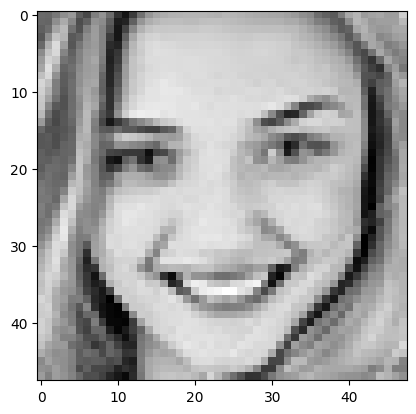

In [ ]:
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

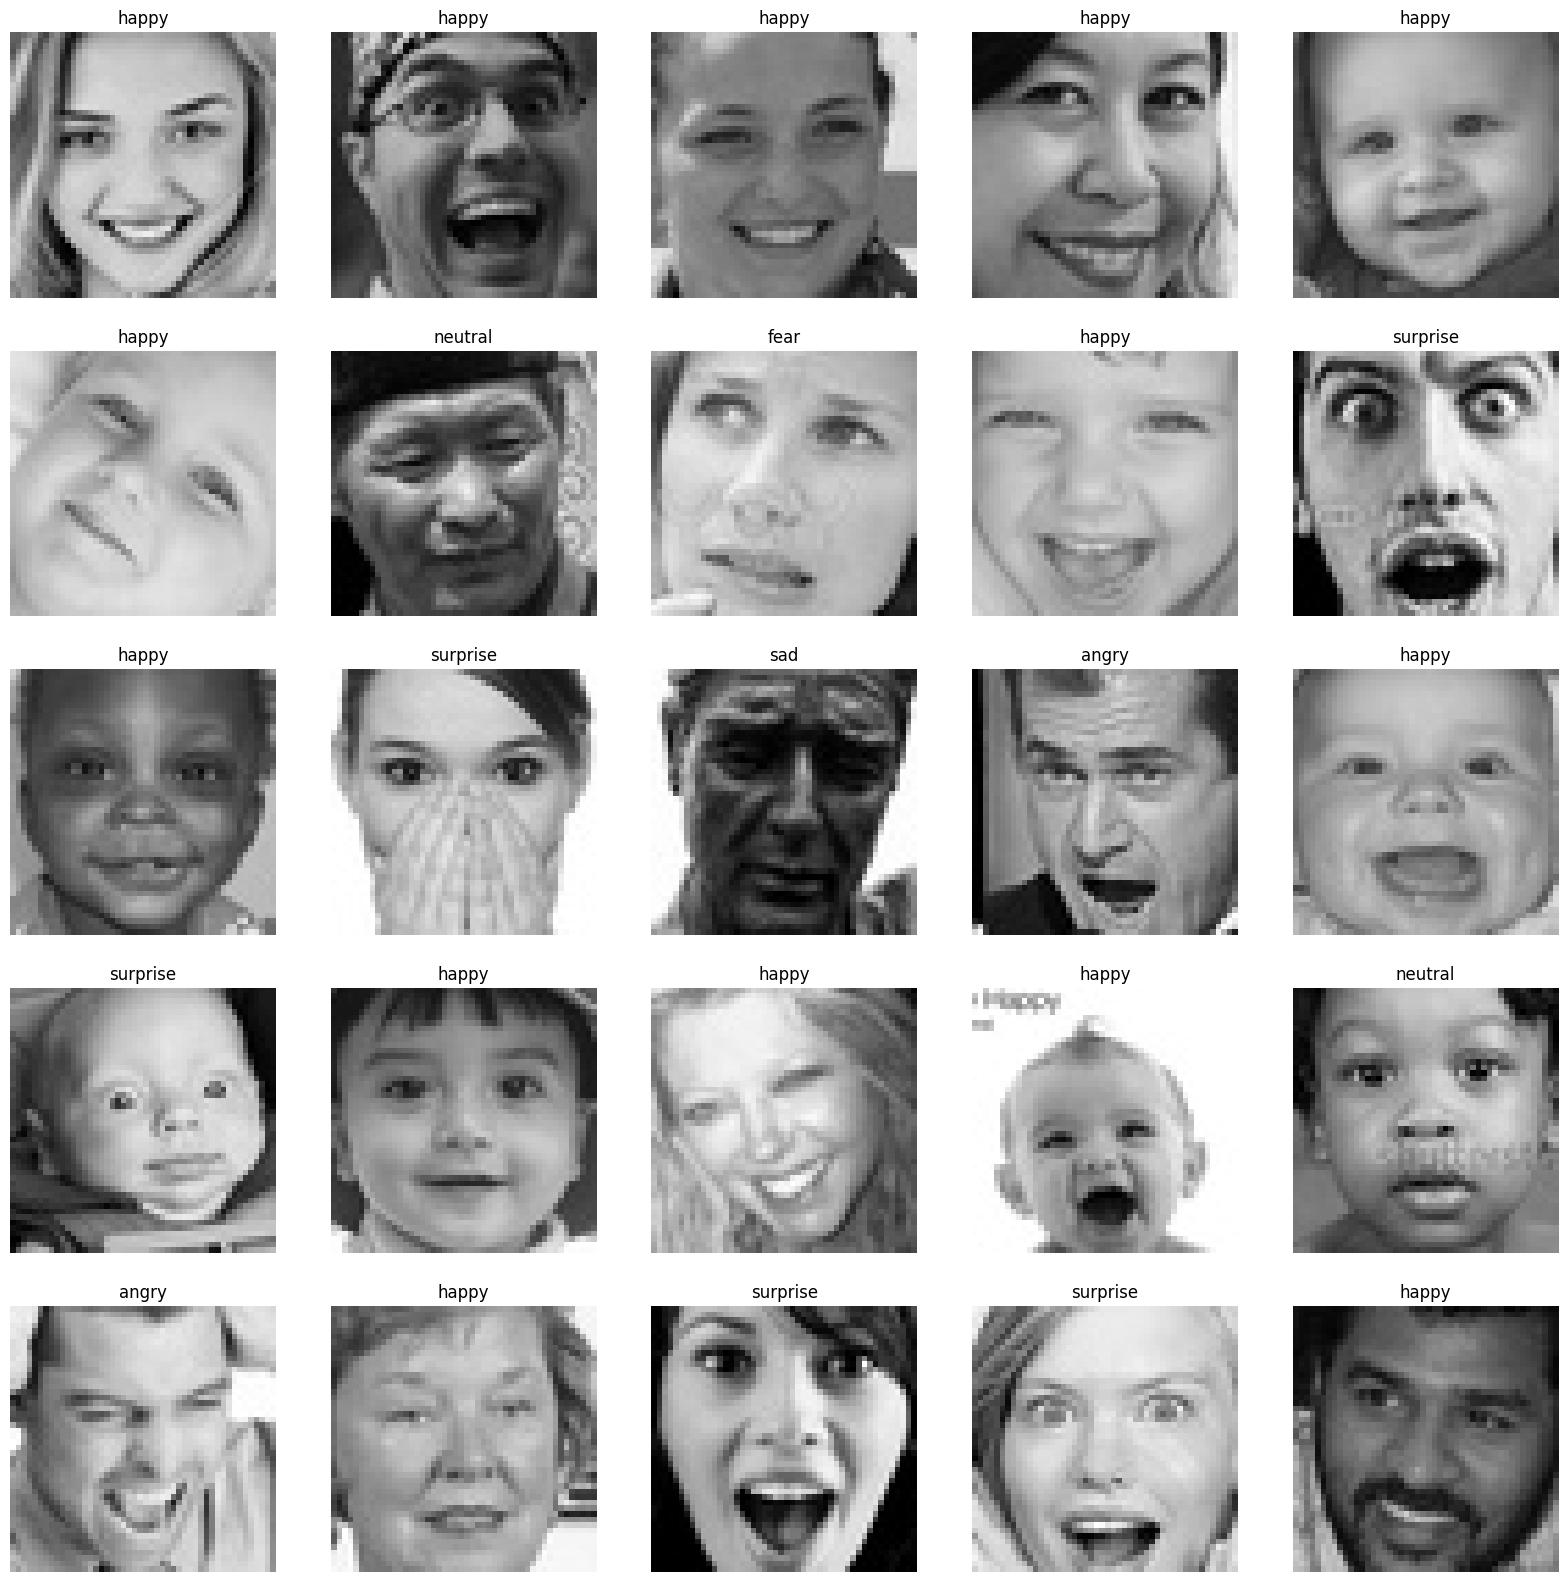

In [ ]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [ ]:
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image, color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [ ]:
train_features = extract_features(train['image'])

In [ ]:
test_features = extract_features(test['image'])

**Normalizing the Image Data, Converting integer values to floating point values**

In [ ]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

**Categorically Encoding the Labels**

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
# config
input_shape = (48, 48, 1)
output_class = 7

**Creating the Model**

In [ ]:
# Model Creation


model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(1024, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
225/225 [==============================] - 16s 61ms/step - loss: 1.8215 - accuracy: 0.2487 - val_loss: 1.8110 - val_accuracy: 0.2471
Epoch 2/200
225/225 [==============================] - 13s 58ms/step - loss: 1.7885 - accuracy: 0.2592 - val_loss: 1.7792 - val_accuracy: 0.2626
Epoch 3/200
225/225 [==============================] - 13s 60ms/step - loss: 1.6901 - accuracy: 0.3159 - val_loss: 1.6073 - val_accuracy: 0.3677
Epoch 4/200
225/225 [==============================] - 13s 56ms/step - loss: 1.5549 - accuracy: 0.3880 - val_loss: 1.4356 - val_accuracy: 0.4395
Epoch 5/200
225/225 [==============================] - 14s 60ms/step - loss: 1.4652 - accuracy: 0.4337 - val_loss: 1.3430 - val_accuracy: 0.4802
Epoch 6/200
225/225 [==============================] - 13s 57ms/step - loss: 1.4106 - accuracy: 0.4530 - val_loss: 1.3191 - val_accuracy: 0.4905
Epoch 7/200
225/225 [==============================] - 13s 57ms/step - loss: 1.3715 - accuracy: 0.4695 - val_loss: 1.2736 - val_ac

**Saving a Model to an H5 File**

In [ ]:
model.save("model.h5")
model.save_weights("weights.h5")
print("Model saved to disk.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to disk.


**Loading a Model from an H5 File**

In [ ]:
# Load the model from the H5 file
loaded_model = load_model("model.h5")
# Load model weights into the new model
loaded_model.load_weights("weights.h5")
print("Model loaded from disk.")

Model loaded from disk.


**Detect emotion type from image**

Original Output: angry
1/1 [==============================] - 0s 19ms/step
Predicted Output: angry


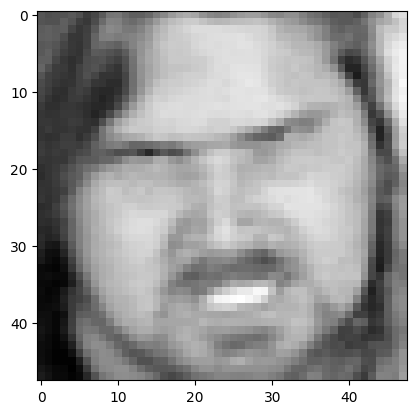

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])

# pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)

plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');